In [1]:
import tensorflow as tf
#Tensor with two rows, one column filled with the value 1
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
#Tensor with two rows, one column filled with the value 0
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
#Creates a tensor filled with random values drawn from a normal distribution
x = tf.random.normal(shape=(3,1), mean = 0, stddev = 1)
print(x)

tf.Tensor(
[[-0.8952349]
 [-0.2889114]
 [-0.626327 ]], shape=(3, 1), dtype=float32)


In [4]:
#creates a tensor with three rows, one column, filled randomly with a uniform distribution of number of values between one and zero.
x = tf.random.uniform(shape=(3,1), minval = 0, maxval = 1)
print(x)

tf.Tensor(
[[0.59743786]
 [0.4482546 ]
 [0.48119462]], shape=(3, 1), dtype=float32)


In [5]:
#Tensors cannot be assigned like numpy arrays or other python concepts. Have to use assign function to do so.
v = tf.Variable(initial_value = tf.random.normal(shape = (3, 1)))
print(v)
v.assign(tf.ones((3, 1)))

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.1766644 ],
       [ 0.8456129 ],
       [-0.83546424]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [6]:
#values can be assigned to a subset of the coefficients
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
#add and subtract
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [8]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
#basic math functions
a = tf.ones((2, 2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [10]:
#Retrieve gradient of the result
input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
#gradients = tape.gradient(loss, weights)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [11]:
#inputs can be any arbitrary tensor
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    #Used to avoid wasting resources to store information required to compute gradient of anything w/ respect to anythin
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [12]:
#position of object with respect to time is the speed of the object (first order).
# The second order would be the acceleration. Outer tape computes gradient of inner. 
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
    print(speed)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


### Linear Classifier

In [13]:
#This sometimes gets asked in machine learning job interviews. Build one from scratch
#Start by building two classes of random points in a 2D plane
import numpy as np
num_samples_per_class = 1000
#cov = [[1, 0.5], [0.5, 1]] makes an oval-like point cloud oriented from bottom left to top right.
negative_samples = np.random.multivariate_normal(mean = [0, 3], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3, 0], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)
print(negative_samples.shape)
print(negative_samples)

(1000, 2)
[[-1.02461842  2.61946693]
 [ 1.32926547  4.35653543]
 [-2.31168308  4.18757671]
 ...
 [ 0.49734447  3.46782618]
 [ 0.0562139   3.37610134]
 [-1.35109324  2.38553414]]


In [14]:
#stack inputs into a single array of shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-1.0246184 ,  2.619467  ],
       [ 1.3292655 ,  4.3565354 ],
       [-2.3116832 ,  4.187577  ],
       ...,
       [ 3.29135   ,  0.7919535 ],
       [ 4.372249  ,  2.18212   ],
       [ 3.6120145 , -0.07248463]], dtype=float32)

In [15]:
#Generate target labels - array of zeros and ones. targets[i, 0] is zero if inputs[i] belongs to class 0 (and inversly for one)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"), np.ones((num_samples_per_class, 1), dtype = "float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


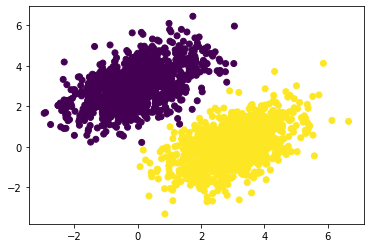

In [16]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [23]:
a = np.array([2,1])
a = a.reshape(2, 1)
a

array([[2],
       [1]])

In [25]:
#Start of actual linear classification - an affine transformation (geometric transformation that preserves lines and parallelism i.e. transformation that can occur through reflection, rotation, scaling, and translation.)
#Prediction = weights * input matrix + b -- creating w and b
input_dim = 2
output_dim = 1
w = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
print(w)
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.5892414],
       [0.3440349]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [26]:
#linear classifier operates on 2d inputs, w is really just two scaler coefficients w = [[w1], [w2]]
#prediction = [[w1], [w2]] * [x, y] + b = w1 * x + w2 * y + b
def model(inputs):
    return tf.matmul(inputs, w) + b

In [27]:
#per sample losses same shape as targets/predictions
#reduce_mean averages the per-sample loss scores into a single scalar loss value
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [32]:
#Training step
learning_rate = 0.1

def training_step(inputs, targets):
    #forward pass inside a gradient tape scope
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    #retrieve the gradient of the loss with regard to weights
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [w, b])
    #print(w)
    #print(b)
    #update the weights
    w.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [33]:
#create batch training loop. Use 40 steps.
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0251
Loss at step 1: 0.0251
Loss at step 2: 0.0251
Loss at step 3: 0.0251
Loss at step 4: 0.0251
Loss at step 5: 0.0251
Loss at step 6: 0.0251
Loss at step 7: 0.0251
Loss at step 8: 0.0251
Loss at step 9: 0.0251
Loss at step 10: 0.0251
Loss at step 11: 0.0251
Loss at step 12: 0.0251
Loss at step 13: 0.0251
Loss at step 14: 0.0251
Loss at step 15: 0.0251
Loss at step 16: 0.0251
Loss at step 17: 0.0251
Loss at step 18: 0.0251
Loss at step 19: 0.0251
Loss at step 20: 0.0251
Loss at step 21: 0.0251
Loss at step 22: 0.0251
Loss at step 23: 0.0251
Loss at step 24: 0.0251
Loss at step 25: 0.0251
Loss at step 26: 0.0251
Loss at step 27: 0.0251
Loss at step 28: 0.0251
Loss at step 29: 0.0251
Loss at step 30: 0.0251
Loss at step 31: 0.0251
Loss at step 32: 0.0251
Loss at step 33: 0.0251
Loss at step 34: 0.0251
Loss at step 35: 0.0251
Loss at step 36: 0.0251
Loss at step 37: 0.0251
Loss at step 38: 0.0251
Loss at step 39: 0.0251


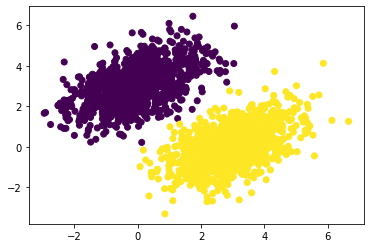

In [35]:
predictions = model(inputs)
#Any predictions above 0.5 is in class 1 and any below is in class 0
plt.scatter(inputs[:, 0], inputs[:,1], c = predictions[:, 0] > 0.5)
plt.show()

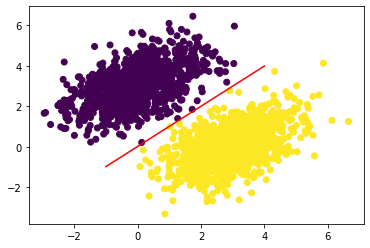

In [41]:
#plot line showing seperation
#linspace plot 100 spaced numbers between -1 and 4
x = np.linspace(-1, 4, 100)
#lines equation
y = - w[0] / w[1] * x + (0.5 - b) / w[1]
#-r refers to color of line
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:,1], c = predictions[:, 0] > 0.5)
plt.show()